# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Crop_Recommendation.csv')

In [6]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [7]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [8]:
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [9]:
df['Crop'] = pd.factorize(df['Crop'])[0] + 1

In [10]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


#### With our data meticulously cleaned, we're all set to embark on the insightful journey of exploratory data analysis (EDA) to uncover hidden patterns and stories within.

# Explorary Data Analysis


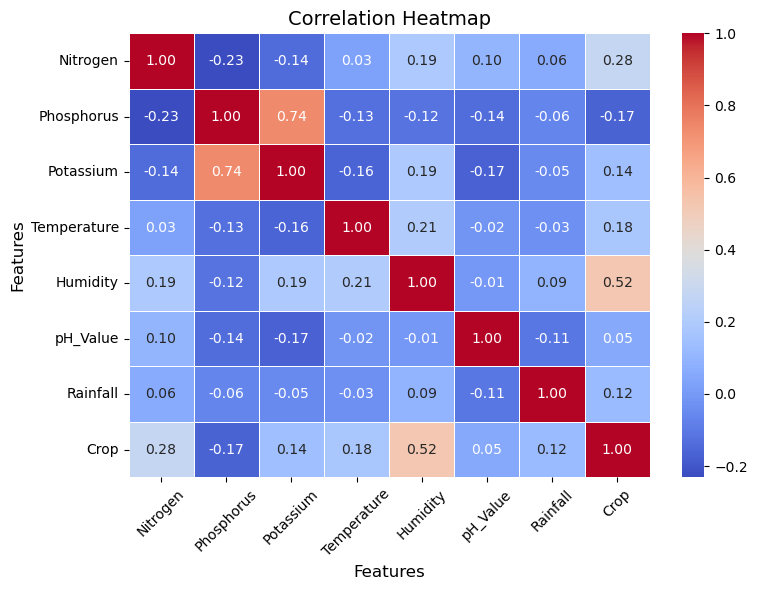

In [22]:
data = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()

plt.show()


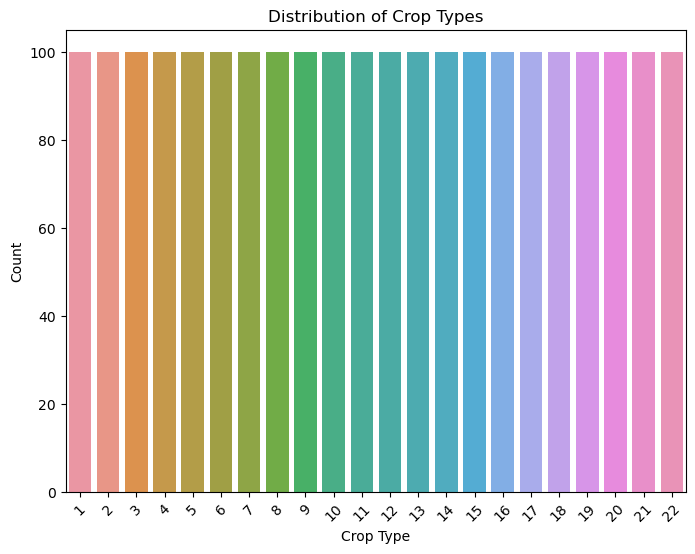

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Crop', data=df)
plt.title('Distribution of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Conclusion:

The even distribution of target classes is a positive indicator for building a robust prediction model, as it suggests a balanced dataset and reduces the risk of bias in our model's predictions

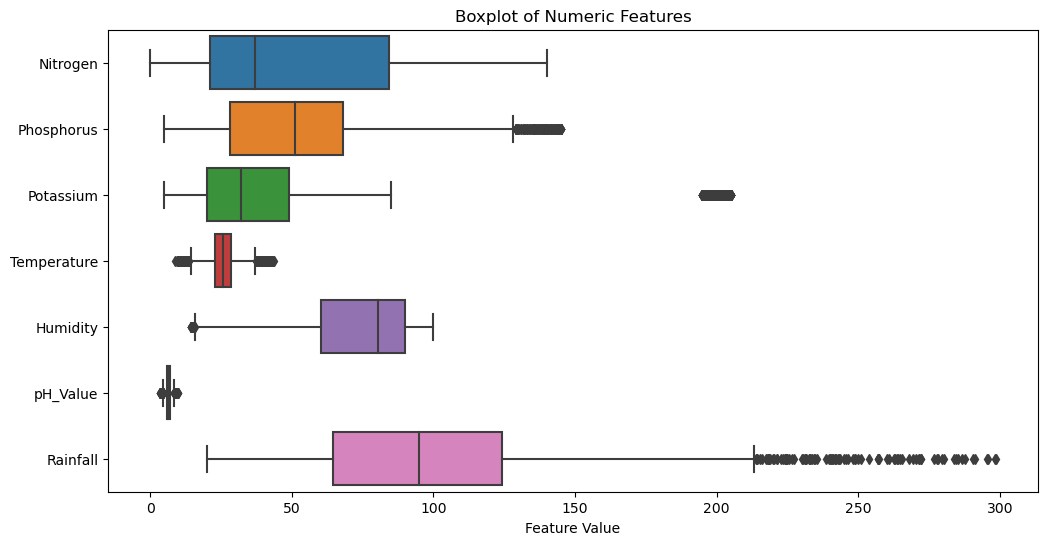

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features], orient='h')
plt.title('Boxplot of Numeric Features')
plt.xlabel('Feature Value')
plt.show()


## Conclusion:

Identifying outliers in the features is crucial, and addressing them becomes imperative if our prediction model encounters issues. Outliers can significantly impact the performance and accuracy of our model, so careful consideration and handling are necessary to ensure robust and reliable predictions.

# Selecting the Right Prediction Model

In [11]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns='Crop')
y= df['Crop']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 45%|████▍     | 13/29 [00:00<00:00, 19.34it/s]c:\Users\electro ain hayat\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
100%|██████████| 29/29 [00:02<00:00, 11.68it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.99,0.99,None,0.99,0.14
RandomForestClassifier,0.99,0.99,None,0.99,0.30
GaussianNB,0.99,0.99,None,0.99,0.00
QuadraticDiscriminantAnalysis,0.99,0.99,None,0.99,0.00
LGBMClassifier,0.99,0.99,None,0.99,0.90
BaggingClassifier,0.99,0.98,None,0.99,0.08
DecisionTreeClassifier,0.98,0.98,None,0.98,0.01
SVC,0.98,0.98,None,0.98,0.07
LabelPropagation,0.98,0.98,None,0.98,0.04


### Conclusion 
With a plethora of classifiers delivering impressive scores, we will focus on the top 5 models for further testing and fine-tuning. This iterative process will help us identify the most robust and accurate prediction model, ensuring optimal performance and the best fit for our specific use case.

# Model tuning

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier


classifiers = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'LGBMClassifier': LGBMClassifier(),
    'BaggingClassifier': BaggingClassifier()
}



param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


results = {}

for name, clf in classifiers.items():
    param_grid = None
    
    if name == 'ExtraTreesClassifier':
        param_grid = param_grid_et
    # Define param_grid for other classifiers similarly

    if param_grid is not None:
        grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)  # Replace X_train, y_train with your data
        results[name] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'test_score': grid_search.score(X_test, y_test)  # Replace X_test, y_test with your test data
        }




for name, result in results.items():
    print(f"{name}:")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Best CV Score: {result['best_score']:.4f}")
    print(f"  Test Score: {result['test_score']:.4f}\n")


ExtraTreesClassifier:
  Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
  Best CV Score: 0.9936
  Test Score: 0.9927



### Conclusion

Through the comprehensive Grid Search process, we have identified the Extra Trees Classifier as the best-performing model with the following optimal parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}. This selection sets the foundation for building a highly effective prediction model, tailored to our specific dataset and objectives.

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

cls = ExtraTreesClassifier(max_depth=None, min_samples_split= 2, n_estimators=200)
cls.fit(X_train, y_train)


ExtraTreesClassifier(n_estimators=200)

In [33]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

def evaluate_classifier(cls, X_test, y_test):
    # Make predictions
    y_pred = cls.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print()
    
    # Compute precision, recall, F1-score, support
    metrics = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision, recall, f1_score, _ = metrics
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print()
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")




In [34]:
evaluate_classifier(cls, X_test, y_test)

Confusion Matrix:
[[40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0 51  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 55  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 56  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 58  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 47  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 48  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 53  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0